In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Activation,Dense,Dropout,BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
os.listdir('/content/drive/MyDrive/dataset')

['test.csv', 'sunrise', 'rainy', 'alien_test', 'cloudy', 'shine', 'foggy']

In [5]:
l=['cloudy','foggy','rainy','shine','sunrise']
def load_imgs(impath,l):
    imgs=[]
    label=[]
    for i in l:
        l2=os.listdir(impath+'/'+i)
        for j in l2:
            c=0
            img=Image.open(impath+i+'/'+j).convert('RGB')
            img=img.resize(size=(50,50))
            imgs.append(np.array(img))
            label.append(i)
            del img
    %matplotlib inline
    plt.figure(figsize=(10,10))
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(imgs[i],cmap="gray")
        plt.axis("off")
    plt.show()
    return np.array(imgs),label

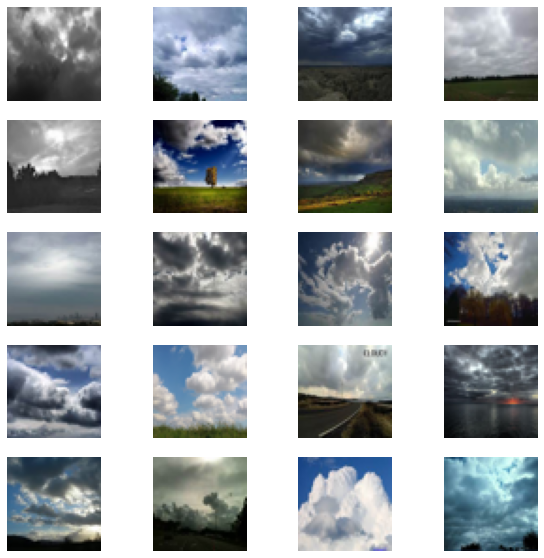

((1500, 50, 50, 3), 1500)

In [7]:
x,y=load_imgs('/content/drive/MyDrive/dataset/',l)
x.shape,len(y)

In [8]:
y[:15]

['cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy']

In [9]:
t=pd.Series(y,dtype='category').cat.codes
t

0       0
1       0
2       0
3       0
4       0
       ..
1495    4
1496    4
1497    4
1498    4
1499    4
Length: 1500, dtype: int8

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.25,random_state=True)
x_train.shape,len(y_train)

((1125, 50, 50, 3), 1125)

In [11]:
x_test.shape,len(y_test)

((375, 50, 50, 3), 375)

In [12]:
x_train.shape[1:]

(50, 50, 3)

In [13]:
model=Sequential()
model.add(Conv2D(32,activation="relu",kernel_size=3,input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,activation="relu",kernel_size=3))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,activation="relu",kernel_size=3))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
36/36 [==============================] - 11s 10ms/step - loss: 8.2223 - accuracy: 0.3956
Epoch 2/25
36/36 [==============================] - 0s 5ms/step - loss: 0.8460 - accuracy: 0.6916
Epoch 3/25
36/36 [==============================] - 0s 5ms/step - loss: 0.7452 - accuracy: 0.7218
Epoch 4/25
36/36 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.7538
Epoch 5/25
36/36 [==============================] - 0s 5ms/step - loss: 0.5546 - accuracy: 0.7893
Epoch 6/25
36/36 [==============================] - 0s 5ms/step - loss: 0.4193 - accuracy: 0.8498
Epoch 7/25
36/36 [==============================] - 0s 5ms/step - loss: 0.3896 - accuracy: 0.8551
Epoch 8/25
36/36 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.8640
Epoch 9/25
36/36 [==============================] - 0s 5ms/step - loss: 0.4825 - accuracy: 0.8178
Epoch 10/25
36/36 [==============================] - 0s 5ms/step - loss: 0.3888 - accuracy: 0.8604
Epoch 11/25
36/36

In [16]:
y_pred = np.argmax(model.predict(x_test),axis=1)
y_pred[:3]

12/12 [==============================] - 1s 24ms/step


array([1, 3, 4])

In [17]:
y_test[:3]

91      0
75      0
1264    4
dtype: int8

In [18]:
_,acc = model.evaluate(x_test,y_pred)
print('Accuracy: %.2f' % (acc*100))

12/12 [==============================] - 1s 7ms/step - loss: 0.1030 - accuracy: 1.0000
Accuracy: 100.00


In [19]:
_,acc = model.evaluate(x_test,y_test)
acc*100

12/12 [==============================] - 0s 5ms/step - loss: 1.0688 - accuracy: 0.7787


77.86666750907898

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7786666666666666

In [21]:
def names(num):
    return l[num]

In [22]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((50,50)))
    x.flatten
    x = x.reshape(1,50,50,3)
    r = model.predict_on_batch(x)
    classification = np.where(r == np.amax(r))[1][0]
    imshow(img)
    print(str(r[0][classification]*100) + '% Confidence ' + names(classification))

62.724727392196655% Confidence rainy


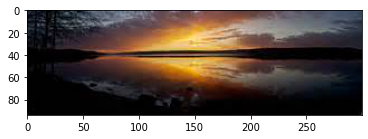

In [23]:
img = Image.open(r"/content/drive/MyDrive/dataset/alien_test/sunrise_2.jpg").convert('RGB')
Prediction(img)

99.9714195728302% Confidence shine


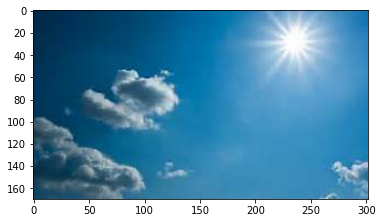

In [36]:
img = Image.open(r"/content/drive/MyDrive/dataset/alien_test/shine_2.jpg").convert('RGB')
Prediction(img)

99.99676942825317% Confidence sunrise


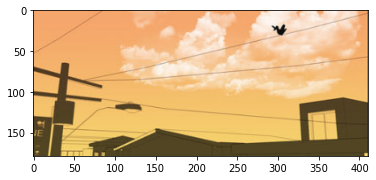

In [25]:
img = Image.open(r"/content/1.png").convert('RGB')
Prediction(img)

100.0% Confidence rainy


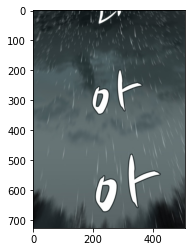

In [26]:
img = Image.open(r"/content/2.png").convert('RGB')
Prediction(img)

79.04605865478516% Confidence shine


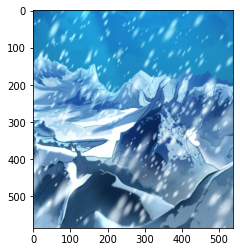

In [27]:
img = Image.open(r"/content/3.png").convert('RGB')
Prediction(img)

83.87637734413147% Confidence rainy


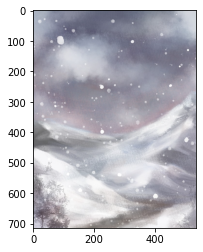

In [28]:
img = Image.open(r"/content/4.png").convert('RGB')
Prediction(img)

98.45665097236633% Confidence cloudy


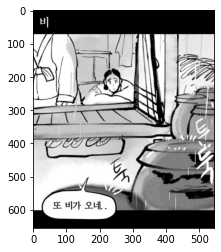

In [29]:
img = Image.open(r"/content/6.png").convert('RGB')
Prediction(img)

81.75426125526428% Confidence cloudy


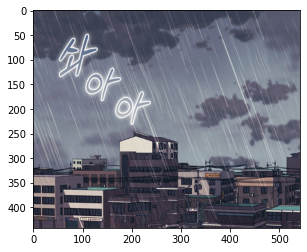

In [30]:
img = Image.open(r"/content/7.png").convert('RGB')
Prediction(img)

99.988853931427% Confidence cloudy


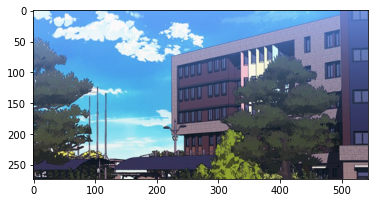

In [31]:
img = Image.open(r"/content/8.png").convert('RGB')
Prediction(img)

57.58764147758484% Confidence cloudy


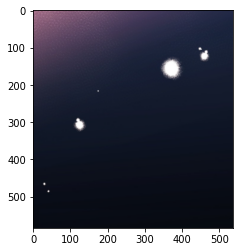

In [32]:
img = Image.open(r"/content/9.png").convert('RGB')
Prediction(img)

99.48496222496033% Confidence shine


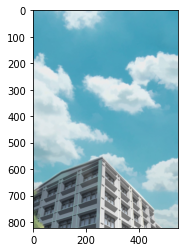

In [34]:
img = Image.open(r"/content/1-1.png").convert('RGB')
Prediction(img)

In [ ]:
img = Image.open(r"../input/multiclass-weather-dataset/dataset/alien_test/sunrise_2.jpg").convert('RGB')
Prediction(img)